### Machine Learning Technical Project **[ANSWER SHEET]**

##### How to work through this project:
- Go cell by cell and finish the marked #TODO's
- You don't need to touch the code marked between the `#---------#`. Those are puzzle pieces that your code will fit into!
    - However, I **STRONGLY** encourage you to understand every single line between those blocks. They are essential!
    - It is crucial that your variable names are what we expect them to be, or the puzzle pieces won't fit.
- Tutorials/helpful information will be placed in the `.md` cells above the "work" cells. Consult them if you are stuck.

In [1]:
# Get used to these imports!
#----------------------------------------------------------------#
#To install: pip install numpy
import numpy as np
#To install: pip install matplotlib
import matplotlib.pyplot as plt
#To install: pip install sklearn
import sklearn
#To install: pip install torchvision
import torchvision as tv
#----------------------------------------------------------------#


Let's first create a fake dataset while familiarizing ourselves with *numpy*, an incredibly critical machine learning/data science Python library. Numpy allows us to perform matrix operations at lightning speeds and, as you have learned, these matrix operations are at the heart of ML.

We want to create two lists, $X$ and $y$, which are comprised of $x_i$ and $y_i$ respectively, defined below:

$$y_i = mx_i + v_i$$

Where

$$i = \{1,2,...,n\}$$

$$x_i = i$$

$$v_i \sim N(0,\sigma)$$

and $$y_i, x_i, v_i \in \mathbb{R}$$

In other words, you are making a line of $n$ datapoints with slope $m$, with a little gaussian noise to perturb it (variance $\sigma$). $x$ goes from zero to $n$ (integers). The $x$ and $y$ of this line are stored in lists. You may ask why I used all that notation above. Well, a significant part of ML is parsing arcane notation, so we are giving you some practice here!

Start off with $n = 100$, $m=1$, and $\sigma = 1$

The following numpy functions will be useful:
- [np.arange](https://numpy.org/doc/2.1/reference/generated/numpy.arange.html)
- [np.random.normal](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html)

The resulting plot should look similar to this:

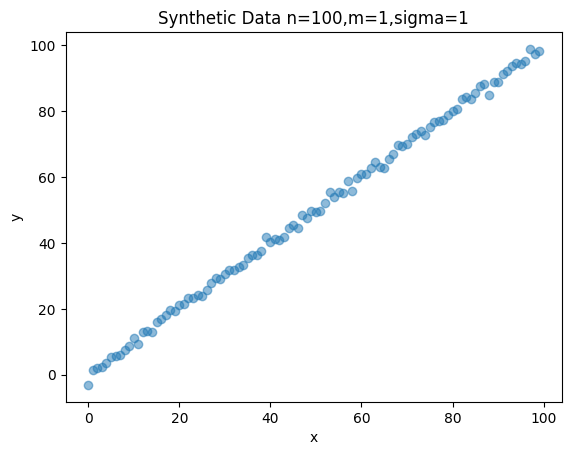

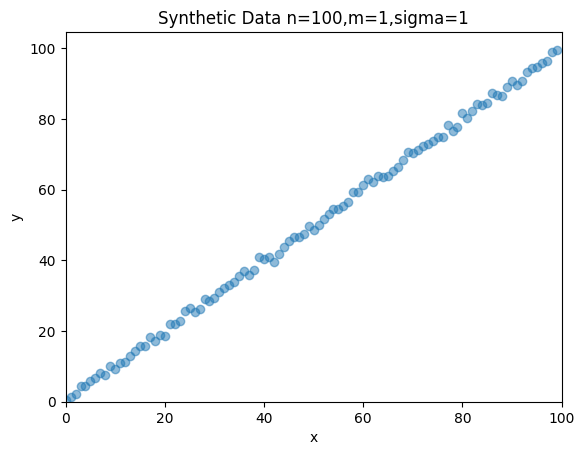

In [2]:
n = 100
m = 1
sigma = 1

## TODO: Create the data as specified above, and store all of the x_i values in a list called X_list
# Additionally store all of the y_i values in a list called y_list
X_list = np.arange(n)
v = np.random.normal(0, sigma, n)
y_list = m*X_list + v

# The code below uses matplotlib to plot the data
#----------------------------------------------------------------#
plt.scatter(X_list, y_list, alpha=0.5)
plt.title(f"Synthetic Data n={n},m={m},sigma={sigma}")
plt.xlim(0, n)
plt.ylim(0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
#----------------------------------------------------------------#

Great! Now we have some synthetic data we can work with, and try linear regression on. We chose to work with only one feature dimension here (i.e. $x \in \mathbb{R}$) to keep this easy to visualize. Now we will use numpy to calculate $\hat{w}$ using the closed form solution discussed in the notes. Here it is again for reference:

$$\hat{w} = (X^{\top}X)^{-1}X^{\top}y$$

The following numpy functions will be useful:
- [np.matmul](https://numpy.org/doc/2.1/reference/generated/numpy.matmul.html) (can also be used as @)
- [np.linalg.inv](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.inv.html) or [np.linalg.solve](https://numpy.org/doc/2.2/reference/generated/numpy.linalg.solve.html)

In [3]:
# The code below reshapes your lists into matrices to allow matrix computations to be performed on them
#----------------------------------------------------------------#
X = np.expand_dims(X_list, axis=1)
y = np.expand_dims(y_list, axis=1)
#----------------------------------------------------------------#

## TODO: Calculate the weights for this regression problem using the closed form solution for ordinary least squares regression
def solve_ols(X, y):
  w = np.linalg.inv(X.T @ X) @ X.T @ y
  # OR
  w = np.linalg.solve(X.T @ X, X.T @ y)

  return w

# The code below tells you if your calculated w is close enough to the ground truth slope m
#----------------------------------------------------------------#
w = solve_ols(X, y)

import math
try:
  assert math.isclose(w.item(), m, abs_tol=0.01)
  print(f"Your calculated w ({w.item():.5f}) was close enough to the expected w ({m})")
except:
  print(f"Your calculated w ({w.item():.5f}) was not close enough to the expected w ({m})")
#----------------------------------------------------------------#

Your calculated w (1.00048) was close enough to the expected w (1)


You should find that we were able to recover the $m$ value through linear regression. This is to be expected as we have found the line of best fit, which will have a slope equal to the slope of the generating function ($y = mx$). The noise ($v$) makes the calculation inexact, but this is to be expected and representative of the real world.

You can mess with $n$, $m$, and $\sigma$ and see how it affects the fit.

Let's plot our calculated slope:

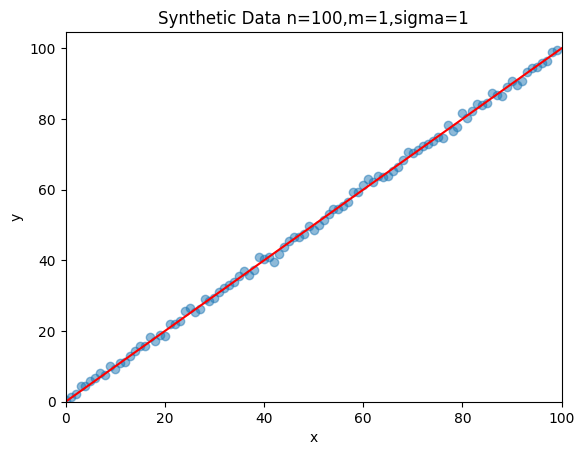

In [4]:
#----------------------------------------------------------------#
plt.scatter(X, y, alpha=0.5)
plt.axline((0, 0), slope=w.item(), color='red')
plt.title(f"Synthetic Data n={n},m={m},sigma={sigma}")
plt.xlim(0, n)
plt.ylim(0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
#----------------------------------------------------------------#

But as you can see, all we get from this is slope information. There is nothing we calculate that can offset our graph up or down. We all know $y= mx + b$, so what's the $b$? It is the *bias* term and it is crucial for data that is not centered at the mean/origin. Let's investigate this now and see how we can include $b$ without doing much extra work with a trick!

Start off by redefining our function:

$$y_i = mx_i + b + v_i$$

Where $b \in \mathbb{R}$ and $v_i \sim \mathcal{N}(0, \sigma^2)$, representing random noise.

Notice how $b$ is not indexed by $i$, which means it is a constant value regardless of $i$.

Let's start with the same values of $n$, $m$, and $\sigma$ from before, with $b=50$.

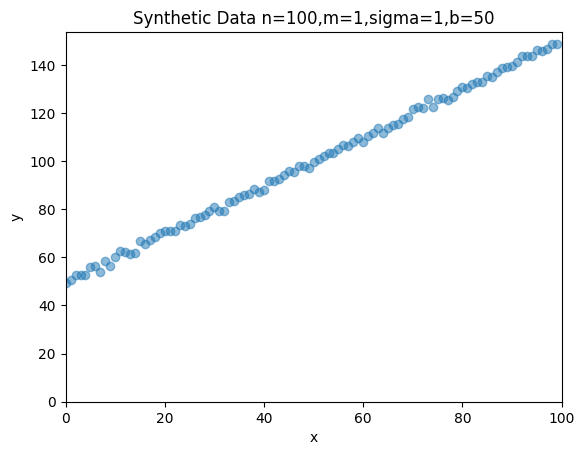

In [5]:
n = 100
m = 1
sigma = 1
b = 50

## TODO: Create the data as specified in the markdown cell above, and store all of the x_i values in a list called X_list
# Additionally store all of the y_i values in a list called y_list. MAKE SURE TO INCLUDE THE BIAS!

X_list = np.arange(n)
v = np.random.normal(0, sigma, n)
y_list = m*X_list + + b + v

# The code below uses matplotlib to plot the data
#----------------------------------------------------------------#
plt.scatter(X_list, y_list, alpha=0.5)
plt.title(f"Synthetic Data n={n},m={m},sigma={sigma},b={b}")
plt.xlim(0, n)
plt.ylim(0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
#----------------------------------------------------------------#

Here is the "bias trick" that will help us here and going forward.

**We can actually implicitly solve for the best value for the bias term by simply adding a column of ones to our data matrix $X$. This will make it so that our final calculated $\hat{w}$ is no longer just the slope, but a list where the first element is the slope and the second element is the intercept.**

Imagine a scenario with $n=3$, $m=2$, $\sigma=0$. With no noise, linear regression will recover this linear relationship perfectly:

$$X = \begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}\;
y = \begin{bmatrix}
2 \\
4 \\
6 \\
\end{bmatrix}\;
\hat{w} = \begin{bmatrix}
m
\end{bmatrix}
$$

$$X\hat{w} = \begin{bmatrix}
m \\
2m \\
3m \\
\end{bmatrix} =
\begin{bmatrix}
2 \\
4 \\
6 \\
\end{bmatrix}
=y\;
$$


This is true when $m=2$, which checks out. We have modeled $y = X\hat{w}$.

Now let's show that adding a ones column to $X$ is functionally the same as modeling $y = Xw + b$. We have again $n=3$, $m=2$, $\sigma=0$ but also $b=3$.

$$X = \begin{bmatrix}
1 & 1\\
2 & 1\\
3 & 1\\
\end{bmatrix}\;
y = \begin{bmatrix}
5 \\
7 \\
9 \\
\end{bmatrix}\;
\hat{w} = \begin{bmatrix}
m \\
b
\end{bmatrix}
$$

Now:

$$X\hat{w} = \begin{bmatrix}
 m+ b\\
2m + b\\
3m + b\\
\end{bmatrix} =
\begin{bmatrix}
5 \\
7 \\
9 \\
\end{bmatrix}
=y\;
$$

This is true when $m=2$ and $b=3$, which checks out. We have modeled $y = X\hat{w} + b$! Adding a column of ones to $X$ and solving for $\hat{w}$ as normal lets us model an intercept!

Now we will implement the bias trick.

The following numpy functions will be useful:
- [np.hstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html)
- [np.ones](https://numpy.org/doc/2.2/reference/generated/numpy.ones.html)


In [6]:
# The code below reshapes your lists into matrices to allow matrix computations to be performed on them
#----------------------------------------------------------------#
X = np.expand_dims(X_list, axis=1)
y = np.expand_dims(y_list, axis=1)
#----------------------------------------------------------------#

## TODO: Modify X using the bias trick (see above).
X = np.hstack([X, np.ones((len(X), 1))])

# The code below reuses your previously created method to solve for w
#----------------------------------------------------------------#
w = solve_ols(X, y)

slope = w[0].item()
intercept = w[1].item()

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
#----------------------------------------------------------------#

Slope: 1.0040293578782082
Intercept: 49.64539642376642


Let's plot using our calculated slope and intercept to see if this worked!

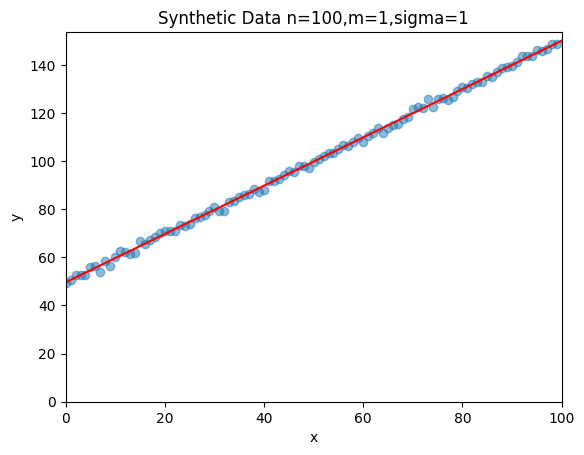

In [7]:
#----------------------------------------------------------------#
plt.scatter(X[:,0], y, alpha=0.5)
plt.axline((0, intercept), slope=slope, color='red')
plt.title(f"Synthetic Data n={n},m={m},sigma={sigma}")
plt.xlim(0, n)
plt.ylim(0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
#----------------------------------------------------------------#

Of course, you expected this to work. It is "linear regression" after all. What if we tried a harder problem? What about trying to use linear regression for... digit classification? It sounds crazy, but let's try it.

Let's first get familiar with our dataset: [MNIST](https://en.wikipedia.org/wiki/MNIST_database). This is the "hello world" dataset of machine learning. It consists of 70000 $28 \times 28$ black-and-white images in the shape of the digits 0-9 in even proportions. We will be working with the 60000 training images in the dataset. The labels are just the numbers 0-9.

Let's take a look at our data and figure out its "shape". It will be really helpful for you to read this: [Data Shape in Numpy](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html)

The following numpy functions will be useful:
- [np.shape](https://numpy.org/doc/2.1/reference/generated/numpy.shape.html)

In [8]:
# Below is the data and labels in two separate variables
#----------------------------------------------------------------#
all_data = tv.datasets.MNIST('./data', download=True)

data = all_data.data.numpy()
labels = all_data.targets.numpy()
#----------------------------------------------------------------#

## TODO: Find and print the shapes of data and labels
print(f"Data Shape:{data.shape}") # = (60000, 28, 28)
print(f"Label Shape: {labels.shape}") # = (60000,)

100%|██████████| 9.91M/9.91M [00:05<00:00, 1.71MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 222kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.20MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.42MB/s]

Data Shape:(60000, 28, 28)
Label Shape: (60000,)


Now let's split the data into Train/Test! Follow the TODOs below.
- [Importance of Train/Test](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data)
- [Slicing Tutorial](https://www.learnbyexample.org/python-list-slicing/)

In [9]:
## TODO: Create the following variables
# train_data: n_train training data from the start of the all_data array
# train_labels: n_train labels associated w/ training data

# test_data: n_test test data from the end of the all_data array
# test_labels = n_test test labels associated w/ test data

n_train = 10000
n_test = 500

train_data = data[:n_train]
train_labels = labels[:n_train]

test_data = data[60000-n_test:]
test_labels = labels[60000-n_test:]

# The below code prints the shapes of the variables. The expected values are listed.
#----------------------------------------------------------------#
print(f"Train Data Shape:{train_data.shape}") # = (n_train, 28, 28)
print(f"Train Label Shape: {train_labels.shape}") # = (n_train,)

print(f"Test Data Shape:{test_data.shape}") # = (n_test, 28, 28)
print(f"Test Label Shape: {test_labels.shape}") # = (n_test,)
#----------------------------------------------------------------#

Train Data Shape:(10000, 28, 28)
Train Label Shape: (10000,)
Test Data Shape:(500, 28, 28)
Test Label Shape: (500,)


Now let's actually look at the data in images.

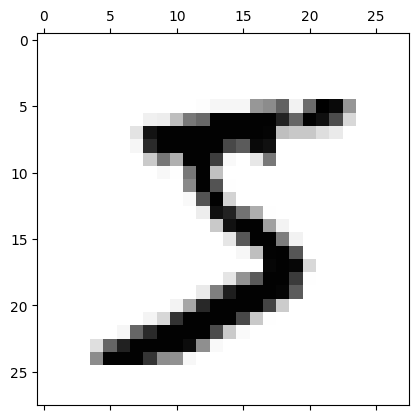

Associated Label: 5
---


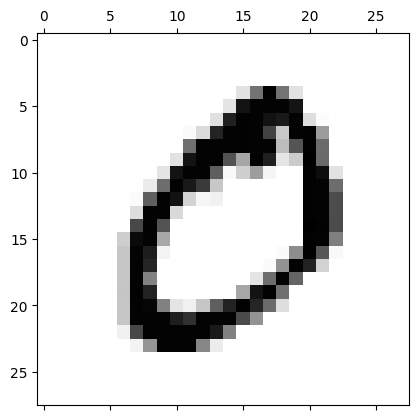

Associated Label: 0
---


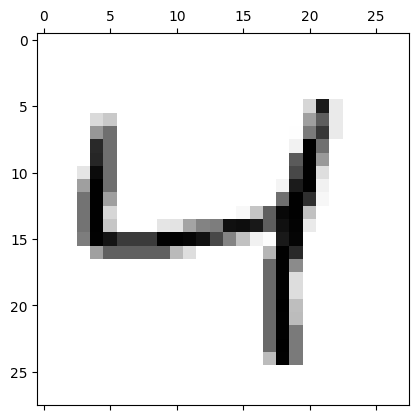

Associated Label: 4
---


In [10]:
# Visualizes num_to_viz digits and labels with plt.matshow and plt.show. Notice how reshape is used to get the data into proper format for visualization.
# Note the use of reshape!
#----------------------------------------------------------------#
num_of_digits_to_viz = 3
for i in range(num_of_digits_to_viz):
    to_reshape = train_data[i]
    plt.matshow(to_reshape.reshape(28, 28), cmap='Greys')
    plt.show()
    print(f"Associated Label: {train_labels[i]}")
    print("---")
#----------------------------------------------------------------#

Now it's time to fit to our MNIST data. This time, we will be using ridge regression and a bias term. We also need to slightly reformat our labels to rephrase this classification problem into a format that ridge regression can accept. All of these things are very important!

- Firstly, we must reshape each data point $x_i \in \mathbb{R}^{28 \times 28}$ (a 28 by 28 matrix) into $x_i \in \mathbb{R}^{784}$ (a 784 dimensional vector). This is achieved through numpys powerful reshape function. *You must do this for both the train and test data.*

- Secondly, we currently have it so that $y_i \in \{0,1,...,9\}$, which is useful for regression models but not so much for classification. However, by using something called *one-hot encoding*, we can make the $y_i$ values more suited for a regularization problem. One-hot encoding transforms each $y$ from a digit from 0-9 to an array of length 10 that has zeros everywhere except at the index of the original label value, where there is a 1. For example, $y = 3$ would be encoded as $[0,0,0,1,0,0,0,0,0,0]$. To get the model prediction, we can take the $\arg\max$ of the output. *We have already done this for you!*

- Thirdly, we have to use the bias trick here once again. Including a bias term is crucial for complex problems. Don't worry, the code should be the exact same or similar. *You must do this for both the train and test data.*

- Fourthly, we have to use a slightly advanced variant of linear regression called ridge regression that we want to implement. The only difference between ordinary least squares and ridge regression is that ridge regression has something called *L2 regularization*. In essence, we ad an additional penalty to the model if it chooses values in $\hat{w}$ that are incredibly high. It also prevents some matrix inversion issues arizing in OLS for complex problems. The closed form derivation for this is very similar to the OLS derivation.

Ridge regression:

$$\hat{w}_{ridge} = \underset{w}{\arg\min} \sum_{i=1}^n (y_i - wx_i)^2 + \lambda||w||_2^2 $$

Solving yields us:

$$\hat{w}_{ridge} = (X^{\top}X + \lambda I)^{-1}X^{\top}y$$

$||w||_2^2$ was the aforementioned L2 regularization. This value increases quadratically as the values in $w$ increase. Ridge regression is therefore incentivised to select smaller weights in its solution $\hat{w}$ to prevent incurring too high of a penalty. $\lambda$ is a coefficient that controls how strong this influence is. This regularization shows up in the closed-form solution as $\lambda I$, where $I$ is the identity matrix (a square matrix with only ones down the diagonals and zeros everywhere else).

The following numpy functions will be useful:
- [np.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)
- [np.hstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html)
- [np.ones](https://numpy.org/doc/2.2/reference/generated/numpy.ones.html)
- [np.eye](https://numpy.org/devdocs/reference/generated/numpy.eye.html)
- [np.matmul](https://numpy.org/doc/2.1/reference/generated/numpy.matmul.html) (can also be used as @)
- [np.linalg.inv](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.inv.html) or [np.linalg.solve](https://numpy.org/doc/2.2/reference/generated/numpy.linalg.solve.html)

In [11]:
# The code below one-hot encodes the training and testing labels
#----------------------------------------------------------------#
y = np.zeros((train_labels.shape[0], 10))
y[np.arange(train_labels.shape[0]), train_labels] = 1

y_test = np.zeros((test_labels.shape[0], 10))
y_test[np.arange(test_labels.shape[0]), test_labels] = 1
#----------------------------------------------------------------#

## TODO: Reshape the train/test data from matrices to vectors and store them in X/X_test respectively
X = train_data.reshape(-1, 784)
X_test = test_data.reshape(-1, 784)

## TODO: Modify X/X_test using the bias trick (see above).
X = np.hstack([X, np.ones((len(X), 1))])
X_test = np.hstack([X_test, np.ones((len(X_test), 1))])

lambda_reg = 0.001

## TODO: Implement the closed form solution for w in the ridge regression setting and use lambda_reg to regularize
def solve_rr(X, y):
  w = np.linalg.inv((X.T @ X) + lambda_reg*np.eye(X.shape[1])) @ X.T @ y
  # OR
  w = np.linalg.solve((X.T @ X) + lambda_reg*np.eye(X.shape[1]), X.T @ y)

  return w

w = solve_rr(X, y)

# The code below calculates and prints your accuracy on the test set using your calculated w
#----------------------------------------------------------------#
total = 0
correct = 0
for x, label in zip(X_test, y_test):
  pred = np.argmax(w.T @ x)
  gt = np.argmax(label)
  if pred == gt:
    correct += 1
  total += 1

import time
t1 = time.time()
print(f"Accuracy on {len(X_test)} test examples: {correct/total}")
print(f"Time taken: {time.time()-t1}")
#----------------------------------------------------------------#

Accuracy on 500 test examples: 0.876
Time taken: 0.00015807151794433594


**Wow!** Did the accuracy surprise you? You should get ~87%. With basic linear algebra you are somehow able to classify handwritten digits pretty well and very quickly. This hopefully demonstrates some cool uses of linear regression you may have thought not possible!

### Congratulations on completing the project!